In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating dataset
L = 100
N = 25
x = np.random.rand(L,N)
t = np.empty(x.shape)
for i in range(x.shape[0]):
    x[i] = np.sort(x[i])
    e = np.random.normal(0,0.1,N)
    t[i] = np.sin(2*np.pi*x[i]) + e

In [4]:
# Training
nos = 25 # Dimension of the kernel
mu = np.linspace(0,1,nos) # Array of means to be used in guassian kernel
sigma = 0.05  # Value of sigma in gaussian kernel
phi = np.empty([L,x.shape[1],nos])
# print(phi.shape)
lam = np.arange(L) # Values of lambda ranging from 1 to L are taken
for k in range(0,phi.shape[0]):
    for i in range(0,phi.shape[1]):
        for j in range(0,phi.shape[2]):
            phi[k,i,j] = np.exp(-((x[k,i]-mu[j])**2)/(2*sigma**2))
w = np.empty([lam.shape[0],phi.shape[1]])
y = np.empty(t.shape)
for i in range(0,lam.shape[0]):
    w[i] = np.matmul(np.linalg.inv(lam[i]*np.identity(nos)+np.matmul(phi[i].T,phi[i])),np.matmul(phi[i].T,t[i]))
    y[i] = np.matmul(phi[i],w[i])

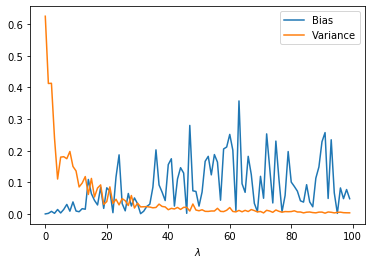

In [5]:
# finding bias and variance
bias = np.empty(L)
var = np.empty(L)
for i in range(0,bias.shape[0]):
    bias[i] = np.abs(np.mean(y[i]) - np.mean(t[i]))
    var[i] = np.mean(y[i]**2) - np.mean(y[i])**2
plt.plot(bias,label = 'Bias')
plt.plot(var, label = 'Variance')
plt.legend()
plt.xlabel('$\lambda$')
plt.show()